# Unit 5 - Financial Planning

In [81]:
# Initial imports
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [82]:
# Load .env enviroment variables
load_dotenv("/Users/javieraramayo/API/APIkeys.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [83]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [84]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [85]:
# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_content = btc_response.content
btc_data = btc_response.json()
btc_price = btc_data["data"]["1"]["quotes"]["CAD"]["price"]
#print(json.dumps(btc_price, indent=4))

# Fetch current ETH price
eth_response = requests.get(eth_url)
eth_content = eth_response.content
eth_data = eth_response.json()
eth_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]
#print(json.dumps(eth_price, indent=4))

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $31440.96
The current value of your 5.3 ETH is $7634.36


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [86]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [87]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [88]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2022-06-27", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df
df_portfolio
# Reorganize the DataFrame
# Separate ticker dat
spy_df = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
agg_df = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
my_portfolio = pd.concat([agg_df, spy_df], axis=1, keys=["AGG", "SPY"])
# Preview DataFrame
my_portfolio.head()

AGG                                    \
                             open     high      low  close   volume   
timestamp                                                             
2022-06-27 04:00:00+00:00  100.68  100.945  100.475  100.6  8262512   

                                                     SPY                  \
                          trade_count       vwap    open    high     low   
timestamp                                                                  
2022-06-27 04:00:00+00:00       33194  100.69446  391.12  391.36  387.44   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-06-27 04:00:00+00:00  388.59  65967268      552197  389.085434

In [89]:
# Pick AGG and SPY close prices
agg_close_price = my_portfolio["AGG"]["close"]
spy_close_price = my_portfolio["SPY"]["close"]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $timestamp
2022-06-27 04:00:00+00:00    100.6
Name: close, dtype: float64
Current SPY closing price: $timestamp
2022-06-27 04:00:00+00:00    388.59
Name: close, dtype: float64


In [90]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = float(my_spy * spy_close_price)
my_agg_value = float(my_agg * agg_close_price)


# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19429.50
The current value of your 200 AGG shares is $20120.00


### Savings Health Analysis

In [91]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_eth_value + my_btc_value
shares = my_agg_value + my_spy_value
savings_data = {"amount": [crypto, shares]}
savings_type = ["crypto", "shares"]

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, index=savings_type)

# Display savings DataFrame
df_savings

,amount
crypto,39075.319754
shares,39549.500000


<AxesSubplot:title={'center':'Savings Composition'}, ylabel='amount'>

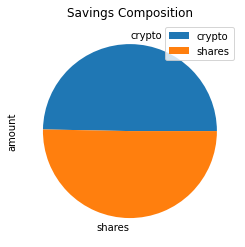

In [92]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Savings Composition")

In [93]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations!. You have enough money in your fund to cover for emergencies")
elif total_savings == emergency_fund:
    print("You have reached your financial goal to have a fund to cover for emergencies")
else:
        deficit = emergency_fund - total_savings
        print("Your savings are less than the required emergency fund, you are $", deficit," shorter on meeting your financial goal")
        

Congratulations!. You have enough money in your fund to cover for emergencies


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [94]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-06-28', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-06-28', tz='America/New_York').isoformat()

In [95]:
# Get 5 years' worth of historical data for SPY and AGG

df_5year_portf = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
spy_ticker = df_5year_portf[df_5year_portf['symbol']=='SPY'].drop('symbol', axis=1)
agg_ticker = df_5year_portf[df_5year_portf['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([agg_ticker, spy_ticker], axis=1, keys=["AGG", "SPY"])

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high      low   close    volume   
timestamp                                                                
2017-06-28 04:00:00+00:00  109.85  109.8800  109.680  109.86  12184475   
2017-06-29 04:00:00+00:00  109.53  109.6800  109.465  109.65   3377194   
2017-06-30 04:00:00+00:00  109.62  109.6273  109.460  109.51   2626939   
2017-07-03 04:00:00+00:00  109.30  109.3000  109.010  109.09   1817281   
2017-07-05 04:00:00+00:00  109.08  109.1800  109.000  109.15   4288609   

                                                      SPY                    \
                          trade_count        vwap    open     high      low   
timestamp                                                                     
2017-06-28 04:00:00+00:00        9789  109.871051  242.51  243.715  242.230   
2017-06-29 04:00:00+00:00       12108  109.620298  243.62  243.720  239.955   
2017-06-30 04:00:00+00:00       10668  109.546443  242.30  242.710  241.575   
2017-07-03 04:00:00+00:00        7321  109.130388  242.90  243.380  242.210   
2017-07-05 04:00:00+00:00       12388  109.122387  242.61  243.010  241.700   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2017-06-28 04:00:00+00:00  243.49   70042599      224934  243.068322  
2017-06-29 04:00:00+00:00  241.35  106949719      395288  241.730427  
2017-06-30 04:00:00+00:00  241.80   86820694      241580  242.015951  
2017-07-03 04:00:00+00:00  242.21   39153806      134045  242.802969  
2017-07-05 04:00:00+00:00  242.77   54427596      184987  242.525892

In [96]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_forecast = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [97]:
# Printing the simulation input data
MC_forecast.portfolio_data.head()

AGG                                       \
                             open      high      low   close    volume   
timestamp                                                                
2017-06-28 04:00:00+00:00  109.85  109.8800  109.680  109.86  12184475   
2017-06-29 04:00:00+00:00  109.53  109.6800  109.465  109.65   3377194   
2017-06-30 04:00:00+00:00  109.62  109.6273  109.460  109.51   2626939   
2017-07-03 04:00:00+00:00  109.30  109.3000  109.010  109.09   1817281   
2017-07-05 04:00:00+00:00  109.08  109.1800  109.000  109.15   4288609   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-06-28 04:00:00+00:00        9789  109.871051          NaN  242.51   
2017-06-29 04:00:00+00:00       12108  109.620298    -0.001912  243.62   
2017-06-30 04:00:00+00:00       10668  109.546443    -0.001277  242.30   
2017-07-03 04:00:00+00:00        7321  109.130388    -0.003835  242.90   
2017-07-05 04:00:00+00:00       12388  109.122387     0.000550  242.61   

                                                                            \
                              high      low   close     volume trade_count   
timestamp                                                                    
2017-06-28 04:00:00+00:00  243.715  242.230  243.49   70042599      224934   
2017-06-29 04:00:00+00:00  243.720  239.955  241.35  106949719      395288   
2017-06-30 04:00:00+00:00  242.710  241.575  241.80   86820694      241580   
2017-07-03 04:00:00+00:00  243.380  242.210  242.21   39153806      134045   
2017-07-05 04:00:00+00:00  243.010  241.700  242.77   54427596      184987   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-06-28 04:00:00+00:00  243.068322          NaN  
2017-06-29 04:00:00+00:00  241.730427    -0.008789  
2017-06-30 04:00:00+00:00  242.015951     0.001865  
2017-07-03 04:00:00+00:00  242.802969     0.001696  
2017-07-05 04:00:00+00:00  242.525892     0.002312

In [98]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_forecast.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/javieraramayo/FTbootC_Mod5_Hmwk/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010758,0.993349,1.006322,1.001461,0.993495,0.992886,0.987947,1.002897,1.000423,1.004265,...,1.006459,0.997154,0.991779,0.991698,1.007007,1.000186,0.998835,1.006832,1.011069,1.015503
2,1.015519,0.991009,1.008897,0.997089,0.994234,0.995683,0.982634,0.999952,1.002030,1.004632,...,1.005547,1.015362,0.995189,0.980583,1.017076,1.006745,0.995516,0.981613,1.011003,1.029119
3,1.019640,0.998418,1.008479,0.982008,0.999954,0.990506,0.993516,1.000806,0.992954,1.000680,...,1.011127,1.009031,0.985743,0.979732,1.001443,0.999804,0.987866,0.977709,1.004235,1.024090
4,1.020891,1.006704,1.001786,0.991560,1.007728,0.988211,0.994449,1.001209,0.999963,0.999046,...,1.012302,1.028860,0.988561,0.976985,0.989279,0.999675,0.980258,0.985521,0.987300,1.022895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.746888,9.658915,9.006187,11.808560,4.792284,3.700940,4.372895,5.530593,7.057258,5.694617,...,5.016363,5.682991,6.464601,11.147728,2.180645,5.309793,1.071928,3.277885,3.686350,0.854210
7557,8.739521,9.744532,9.068561,11.729464,4.791442,3.681513,4.425759,5.459548,7.049475,5.696970,...,5.072083,5.708415,6.517028,11.125251,2.171161,5.273577,1.064637,3.245531,3.694542,0.846356
7558,8.801531,9.821950,9.079109,11.667975,4.807001,3.650826,4.427166,5.449394,6.972858,5.742741,...,5.002564,5.772341,6.506409,11.117157,2.152888,5.319793,1.062971,3.235532,3.708961,0.850228
7559,8.884801,9.749829,9.062526,11.674207,4.800792,3.667455,4.456446,5.455099,6.982578,5.793314,...,4.973902,5.841401,6.501841,11.198129,2.146681,5.395178,1.064613,3.218654,3.708562,0.842801


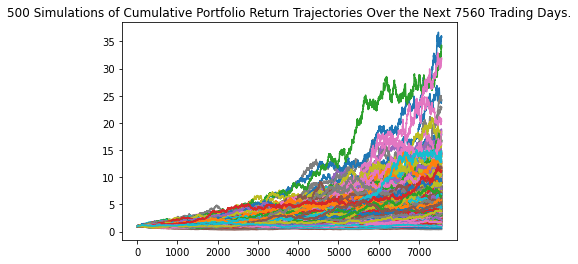

In [99]:
# Plot simulation outcomes
line_plot = MC_forecast.plot_simulation()

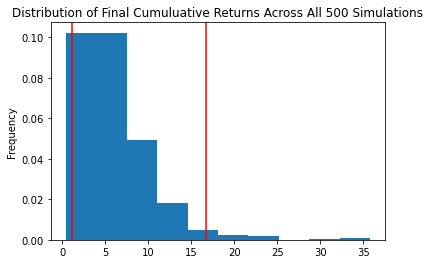

In [100]:
# Plot probability distribution and confidence intervals
dist_plot = MC_forecast.plot_distribution()

### Retirement Analysis

In [101]:
# Fetch summary statistics from the Monte Carlo simulation results
simulation_stats = MC_forecast.summarize_cumulative_return()

# Print summary statistics
print(simulation_stats)

count           500.000000
mean              6.018942
std               4.344935
min               0.386687
25%               3.198608
50%               4.967067
75%               7.753500
max              35.775699
95% CI Lower      1.098019
95% CI Upper     16.634667
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [102]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(simulation_stats[8]*initial_investment,2)
ci_upper = round(simulation_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $21960.39 and $332693.34


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [103]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(simulation_stats[8]*initial_investment,2)
ci_upper = round(simulation_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $32940.58 and $499040.01


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [104]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_forecast_5Y = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [105]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_forecast_5Y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/javieraramayo/FTbootC_Mod5_Hmwk/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991890,1.001672,1.007924,1.005644,1.001714,1.004368,0.996260,1.005185,1.003134,1.005628,...,1.008921,1.004197,1.012448,1.004160,1.008896,1.004739,1.018238,1.008860,0.982860,1.002456
2,1.001796,1.012404,1.017336,1.017031,1.017395,1.006388,0.990996,1.006244,1.007695,1.024343,...,1.010398,1.005458,0.996670,0.996936,1.016599,1.019715,1.041488,1.003450,0.989987,1.003151
3,1.000427,1.008703,1.017417,1.009964,1.019917,1.017033,0.988764,0.998309,1.014486,1.018228,...,1.007213,0.985741,1.001805,0.988076,1.007291,1.029930,1.041701,0.990879,0.986290,0.999861
4,1.008505,1.009356,1.023294,1.006467,1.013575,1.017416,0.985579,0.987810,1.010954,1.023934,...,1.009400,0.995111,0.998941,0.976652,1.002784,1.046103,1.030135,0.995464,0.992894,0.992942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.542661,1.172114,1.039525,1.465194,2.431353,1.620117,0.908930,1.170680,1.439849,1.623138,...,1.836902,1.548324,1.668815,1.836909,1.547629,0.890007,1.829337,1.802702,1.501530,1.529238
1257,1.547292,1.180686,1.036533,1.456510,2.402906,1.628008,0.904796,1.170880,1.429082,1.621338,...,1.837655,1.541885,1.669526,1.841292,1.537950,0.883738,1.835968,1.808869,1.495460,1.514843
1258,1.529618,1.175454,1.055958,1.474473,2.413792,1.619554,0.908302,1.163118,1.433861,1.613405,...,1.847888,1.532741,1.675022,1.849479,1.546695,0.881870,1.834516,1.829992,1.503012,1.505324
1259,1.530486,1.166030,1.058767,1.469822,2.413112,1.633954,0.905157,1.168504,1.422096,1.610560,...,1.824386,1.531631,1.668914,1.845442,1.560042,0.877319,1.839779,1.844788,1.507397,1.522073


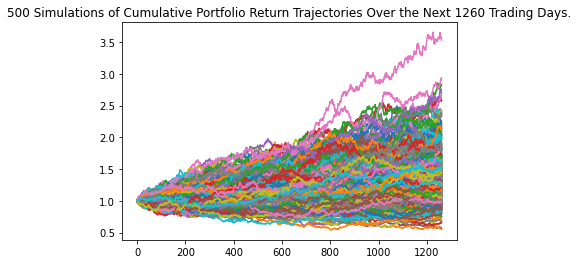

In [106]:
# Plot simulation outcomes
line_plot = MC_forecast_5Y.plot_simulation()

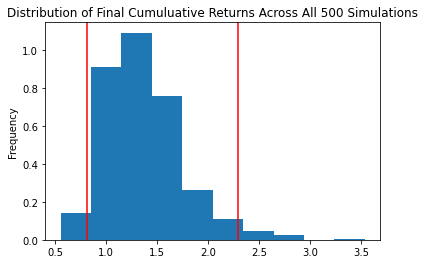

In [107]:
# Plot probability distribution and confidence intervals
dist_plot = MC_forecast_5Y.plot_distribution()

In [108]:
# Fetch summary statistics from the Monte Carlo simulation results
simulation_stats_5Y = MC_forecast_5Y.summarize_cumulative_return()

# Print summary statistics
print(simulation_stats_5Y)


count           500.000000
mean              1.361831
std               0.392748
min               0.550682
25%               1.084831
50%               1.309299
75%               1.577640
max               3.534361
95% CI Lower      0.813665
95% CI Upper      2.293511
Name: 1260, dtype: float64


In [110]:
# Set initial investment
initial_investment_100K = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $100,000
ci_lower_five = round(simulation_stats[8]*initial_investment_100K,2)
ci_upper_five = round(simulation_stats[9]*initial_investment_100K,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_100K} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 5 years will end within in the range of $109801.93 and $1663466.71


### Ten Years Retirement Option

In [111]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_forecast_10Y = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [112]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_forecast_10Y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/javieraramayo/FTbootC_Mod5_Hmwk/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005054,1.003900,1.005152,1.020793,1.002878,1.002679,0.993726,1.009253,1.002591,1.009989,...,1.009083,0.998098,1.006549,0.993351,0.999101,1.000268,1.000867,0.991313,1.016132,1.005965
2,1.008644,1.011295,1.006330,1.021594,1.013912,0.999335,0.986483,1.019158,1.010985,1.002804,...,1.013388,0.987196,0.992022,0.988223,1.001736,0.996858,1.002528,0.979020,1.022302,1.005425
3,1.017377,1.019762,1.001761,1.017118,0.994935,0.992955,0.977335,1.031925,1.003754,0.995517,...,1.011726,0.991696,0.993604,0.987270,1.013674,0.998087,1.006467,0.993458,1.012857,1.000859
4,1.022190,1.024561,1.009045,1.015647,1.004599,0.993960,0.976098,1.046570,1.008209,1.003727,...,1.019442,0.986675,1.004546,0.991104,1.028936,1.009415,1.015436,0.989323,1.006720,1.003385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.402696,1.254540,1.343250,2.217867,1.751096,1.676692,1.440482,1.246372,2.412685,1.386439,...,1.179989,2.195341,1.261002,1.785396,2.533046,1.596324,0.859270,1.684741,1.412433,1.093639
2517,1.416177,1.254952,1.362096,2.203589,1.748771,1.681572,1.434026,1.244988,2.402640,1.387439,...,1.183687,2.184013,1.260451,1.783508,2.527734,1.600044,0.863710,1.685987,1.416138,1.087608
2518,1.415031,1.277046,1.347513,2.229697,1.759939,1.663680,1.420480,1.248641,2.429761,1.390673,...,1.159103,2.190632,1.277049,1.802720,2.528256,1.594695,0.867365,1.677343,1.422190,1.097681
2519,1.414533,1.284376,1.323688,2.241281,1.735616,1.672276,1.396509,1.242207,2.431863,1.386580,...,1.159441,2.195021,1.280603,1.812445,2.524875,1.613240,0.876764,1.652107,1.400690,1.089165


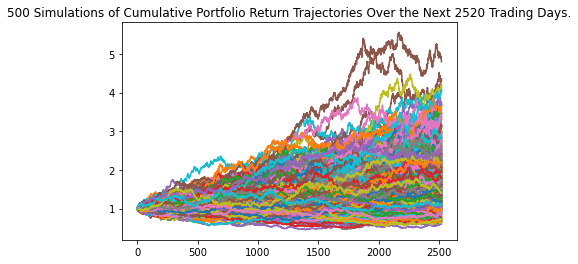

In [113]:
# Plot simulation outcomes
line_plot = MC_forecast_10Y.plot_simulation()

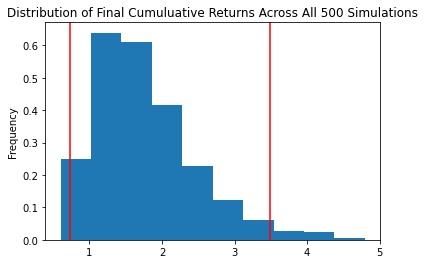

In [114]:
# Plot probability distribution and confidence intervals
dist_plot = MC_forecast_10Y.plot_distribution()

In [115]:
# Fetch summary statistics from the Monte Carlo simulation results
simulation_stats_10Y = MC_forecast_10Y.summarize_cumulative_return()
# Print summary statistics
print(simulation_stats_10Y)

count           500.000000
mean              1.767773
std               0.692220
min               0.600993
25%               1.245584
50%               1.665718
75%               2.116324
max               4.794273
95% CI Lower      0.730341
95% CI Upper      3.482227
Name: 2520, dtype: float64


In [116]:
# Set initial investment
initial_investment_100K = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $100,000
ci_lower_ten = round(simulation_stats[8]*initial_investment_100K,2)
ci_upper_ten = round(simulation_stats[9]*initial_investment_100K,2)



# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_100K} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $109801.93 and $1663466.71
